<a href="https://colab.research.google.com/github/aidot-kr/AISecurity/blob/master/5_Word2Vec_FastText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word2Vec

- Gensim 패키지를 사용한 Word2Vec
- 참고URL: https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial

1) 학습에 필요한 코퍼스 수집

In [ ]:
# 설치된 라이브리 호출
import wikipediaapi
import urllib.request
from konlpy.tag import Okt
from gensim.models.word2vec import Word2Vec
import pandas as pd
import matplotlib.pyplot as plt


# 페이지 요약 정보를 수집
wiki_txt=wikipediaapi.Wikipedia('ko')
#search_nm = '스미싱'

# 해당 페이지가 존재하는지 확인
page_py = wiki_txt.page(search_nm) 
print("Page - Exists: %s" % page_py.exists())

# 페이지의 내용 전체를 수집
wiki = wikipediaapi.Wikipedia( language='ko', extract_format=wikipediaapi.ExtractFormat.WIKI) 
p_wiki = wiki.page(search_nm) 
print(p_wiki.text)

Page - Exists: True
문자메시지 피싱(SMS phishing, 스미싱, Smishing)은 문자메시지를 이용한 피싱이다. 스미싱은 SMS(문자메시지)와 피싱(Phising)의 합성어이다.
신뢰할 수 있는 사람 또는 기업이 보낸 것처럼 가장하여 개인비밀정보를 요구하거나 휴대폰 소액 결제를 유도한다. 최근 들어 스마트폰 이용자들이 늘어남에 따라 돌잔치, 결혼 청첩장 등이 도착하였다고 하면서 링크를 걸어 안드로이드 애플리케이션 설치파일인 apk 파일을 설치하도록 유도하여 휴대폰 내의 정보를 빼가는 수법이 늘고 있다.

피해 예방법
OS가 안드로이드 단말기인 경우, Google Play 이외의 경로를 통한 응용 애플리케이션의 설치를 허용 또는 차단하는 기능인 "알수 없는 소스"의 옵션을 제공하고 있으므로, 해당 부분의 체크를 해제함
구글플레이 스토어에서 "스미싱 차단"을 검색하여 스미싱 차단 전용 앱을 설치함.
스미싱 차단 (잡았다 피싱) : https://play.google.com/store/apps/details?id=org.azki.smishing

같이 보기
단문 메시지 서비스
피싱
피싱프리

각주
외부 링크
경찰청 사이버안전국 예방수칙


2) 데이터 전처리
- 문장 추출, 불용어 제거

In [ ]:
import nltk #자연어 처리 패키지
from nltk.corpus import stopwords #NLTK에서 제공되는 불용어 사전
import string # Python  문자열 처리 클래스
import pandas as pd # 데이터분석 라이브러리
import re
from nltk.tokenize import word_tokenize, sent_tokenize

#stopwords_kor = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def process_text(text):
    #1 문자 구분자 제거
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2 영어 불용어 제거
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3 한글 불용어 제거
    #clean_words = [word for word in clean_words if not word in stopwords_kor] # 불용어 제거
    
    #3 리스트 반환
    return clean_words

In [ ]:
# 전체 문장 전처리 및 문단 기준 분리
from textblob import TextBlob

tokenized_data = []
text = p_wiki.text
blob = TextBlob(text) # TextBolob 객체 생성

#토큰화(문장기준) 처리
for sentence in blob.sentences: 
    temp = " ".join(process_text(sentence))
    
    temp = okt.nouns(temp)
    temp = [word for word in temp if len(word) > 1]
    print(temp)

    tokenized_data.append(temp)
    

['문자메시지', '피싱', '스미싱', '문자메시지', '이용', '피싱']
['스미싱', '문자메시지', '피싱', '합성어']
['신뢰', '사람', '기업', '가장', '개인', '비밀', '정보', '요구', '거나', '휴대폰', '소액', '결제', '유도']
['최근', '스마트폰', '이용자', '돌잔치', '결혼', '청첩장', '도착', '링크', '안드로이드', '애플리케이션', '설치', '파일', '파일', '설치', '유도', '휴대폰', '내의', '정보', '수법']
['피해', '방법', '안드로이드', '단말기', '경우', '이외', '경로', '통한', '응용', '애플리케이션', '설치', '허용', '차단', '기능', '소스', '옵션', '제공', '해당', '부분', '체크', '해제', '구글플레이', '스토어', '스미싱', '차단', '검색', '스미싱', '차단', '전용', '설치']
['스미싱', '차단', '피싱', '보기', '단문', '메시지', '서비스', '피싱', '피싱', '프리', '각주', '외부', '링크', '경찰청', '사이버', '전국', '예방']


3) Word2Vec 모델생성 및 주요파라미터
- min_count : 최소단어의 빈도
- window: 현재 단어와 예측 단어 사이의 최대 거리
- size: 피처 벡터의 차원
- negative: 0 이상인 경우 네거티브 샘플링이 사용됨
- workers: 작업자의 스레드 갯수

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 200, window = 5, negative = 2, min_count = 1, workers = 4, sg = 1)

# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(65, 200)

4) 모델 사용

In [ ]:
print(model.wv.most_similar("스미싱"))

[('검색', 0.12537994980812073), ('스마트폰', 0.12402176856994629), ('제공', 0.10534940659999847), ('안드로이드', 0.09977912157773972), ('합성어', 0.09224571287631989), ('차단', 0.07763747870922089), ('파일', 0.06671517342329025), ('소액', 0.06664484739303589), ('링크', 0.06294028460979462), ('전국', 0.06182485818862915)]


## FastText

In [ ]:
from gensim.models import FastText
ft_model = FastText(tokenized_data, size=200, window=5, negative = 2,min_count=1, workers=4, sg=1)

In [ ]:
print(ft_model.wv.most_similar("스미싱"))

[('프리', 0.2559114098548889), ('경찰청', 0.15329334139823914), ('스마트폰', 0.1381201148033142), ('내의', 0.11933795362710953), ('해당', 0.10541693866252899), ('도착', 0.10239065438508987), ('방법', 0.09139144420623779), ('돌잔치', 0.0876629576086998), ('제공', 0.08260121941566467), ('결혼', 0.07770846039056778)]


### word2vec 시각화

In [ ]:
# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

#model_name = '300features_40minwords_10text'
#model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


65
[-0.0014778  -0.00040868  0.00083476 -0.00036821  0.00148917  0.0017568
 -0.0008883  -0.00244621 -0.00056788 -0.00120707]


In [ ]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

df.head(10)

,x,y
문자메시지,18.067318,-4.797532
피싱,-29.801771,5.315793
스미싱,-14.528677,81.298271
이용,-23.770391,-16.347271
합성어,-9.810863,-49.776756
신뢰,-18.155386,37.671120
사람,-44.524204,4.950394
기업,46.586029,-3.805108
가장,-6.725829,-76.803673
개인,24.084148,55.562500


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from c

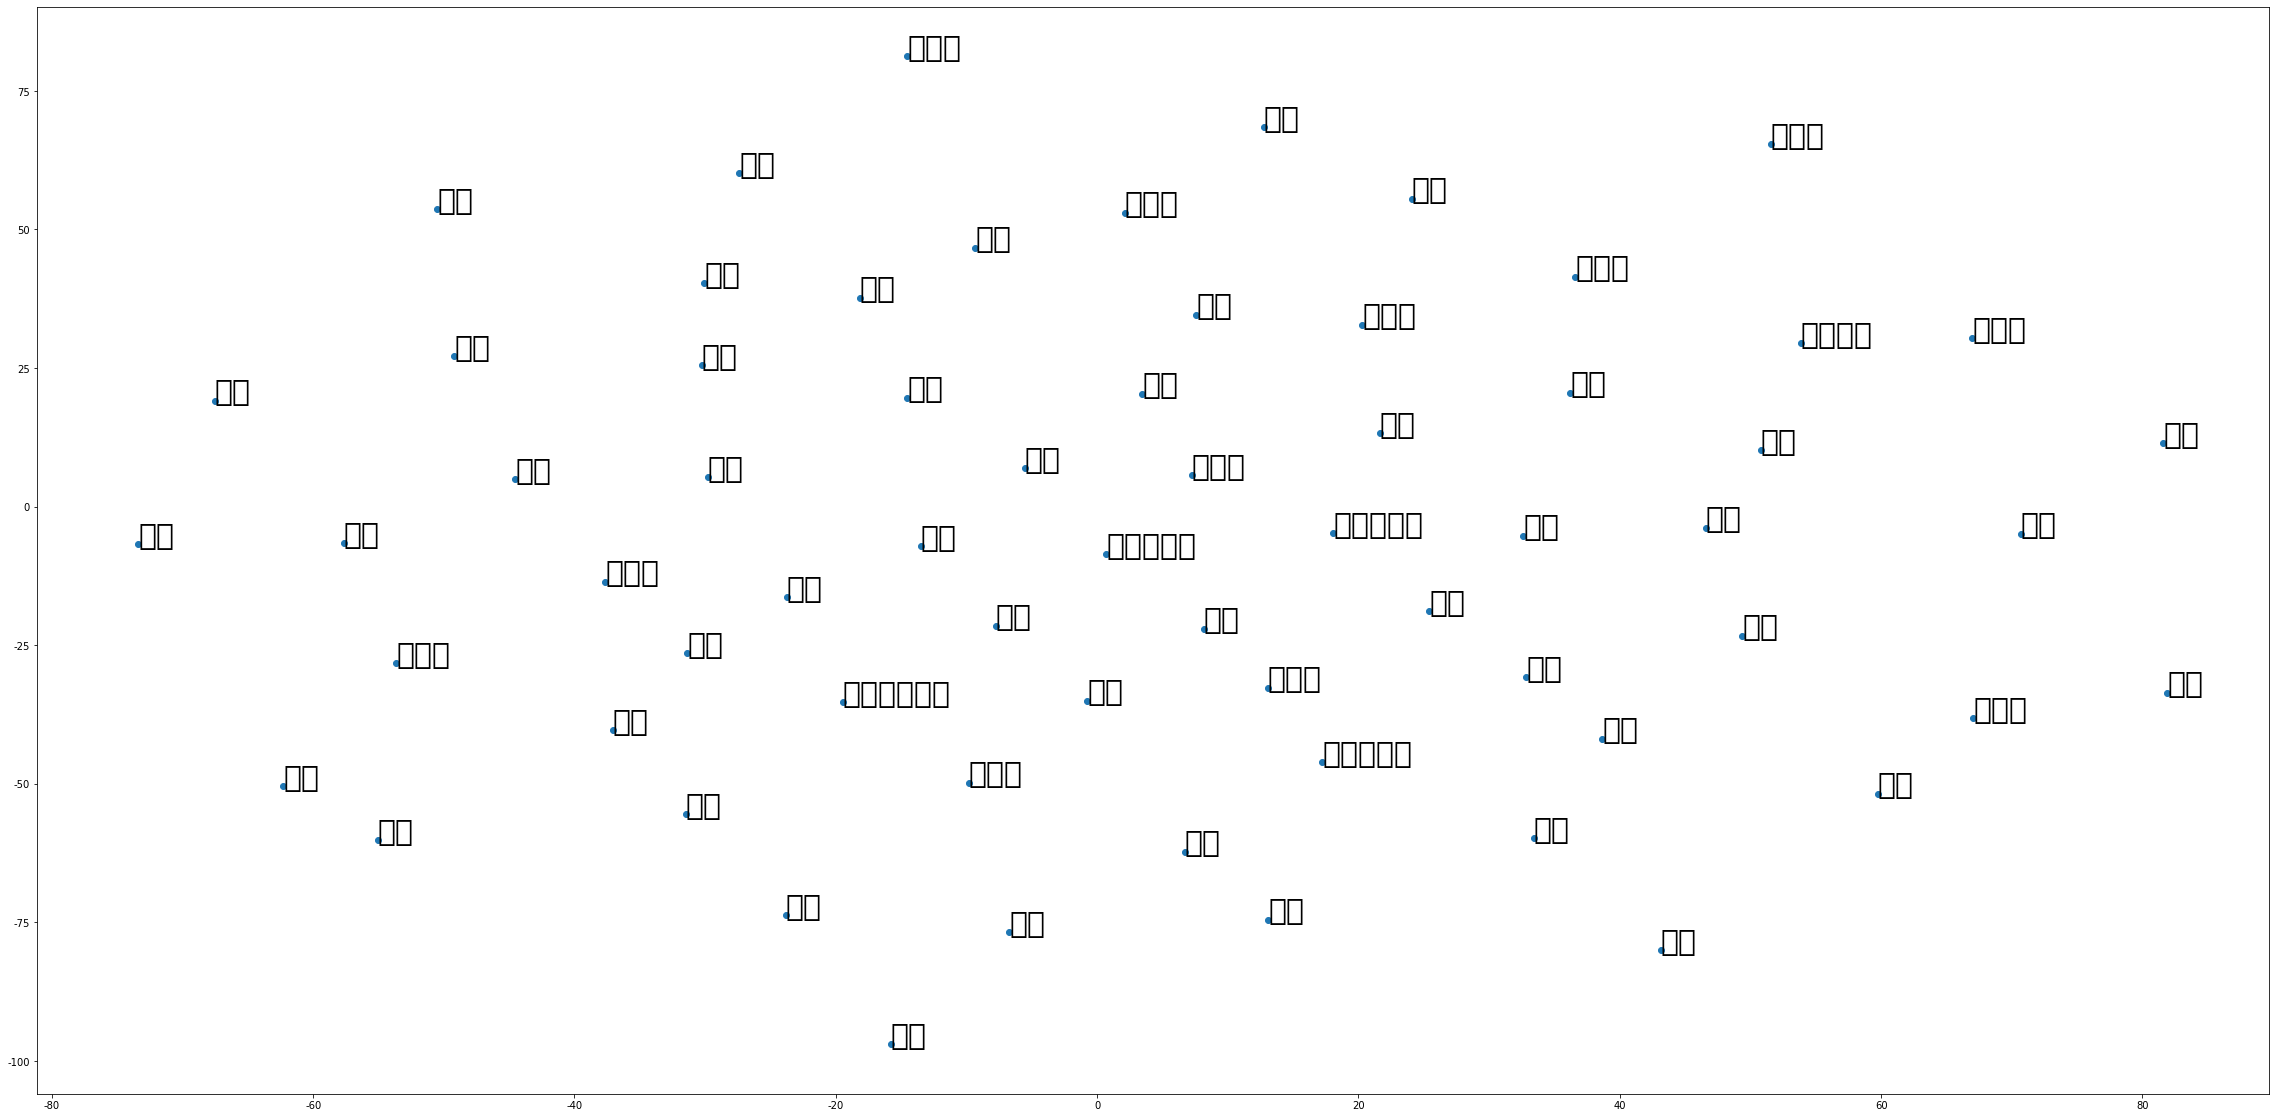

In [ ]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()